# EDA on haberman dataset
## The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv("C:/Users/lenovo/downloads/haberman.csv")

In [207]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [284]:
print("mean :", df[df["status"] == 1]["nodes"].mean(), "stdev :", df[df["status"] == 1]["nodes"].std())


mean : 2.7911111111111113 stdev : 5.870318127719728


## Observation 1
### We Can clearly see there is high standard dev, Maybe it caused due to dataset has various ages . So, lets group them by ages. and We will try to find mean and stdev for the all the quartiles of ages

In [209]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


### we got the quartile ages as below 44, 44-52, 52-60, 60 above 

In [210]:
#Grouping all the 1st quartile age people and finding mean and stdev of nodes for that age group

c1 = df[df.age <= 44]
c1
print("mean: ", c1[c1.status == 1]["nodes"].mean(),"\nstdev :", c1[c1.status == 1]["nodes"].std())
print("The above data is of nodes for status 1 of 44 years below age group")

mean:  3.4375 
stdev : 5.740070792108116
The above data is of nodes for status 1 of 44 years below age group


In [211]:
#Grouping all the 2nd quartile age people and finding mean and stdev of nodes for that age group

c2 = df[(df["age"] > 44) & (df["age"] < 52)]
c2
print("mean :", c2[c2.status == 1]["nodes"].mean(), "\nstdev :", c2[c2.status == 1]["nodes"].std())

mean : 2.046511627906977 
stdev : 3.22898692923141


## Observation 2
### The data is widely spread
### still we are getting high stdev so we can't draw any conclusion from finding avg nodes of a certain age group to tell about their possible life span

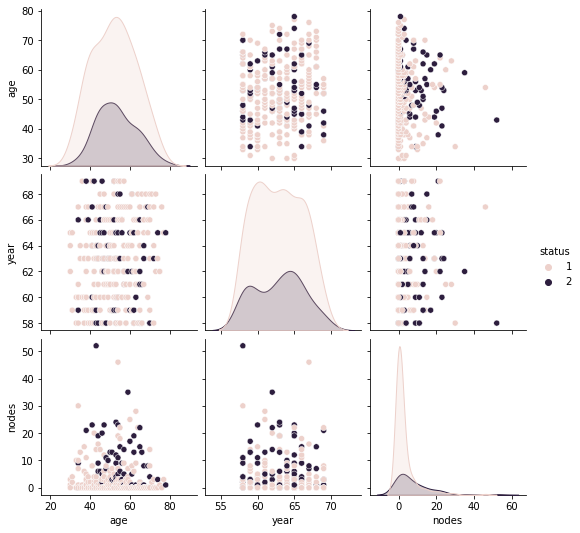

In [212]:
sns.pairplot(df, hue = "status")

<AxesSubplot:xlabel='age', ylabel='nodes'>

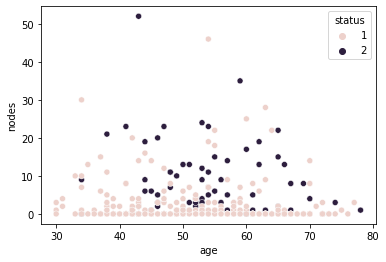

In [267]:
sns.scatterplot(data = df, y = "nodes", x = "age", hue = "status")

## Observation 3

### People with 0 nodes are surviving irrespective of their age

In [276]:
df["status"].value_counts()

1    225
2     80
Name: status, dtype: int64

####  We can there is a total of 225 patients with status 1 which is 73% and 80 with status 2 which is 27%
#### So a patient is more likely to survive for more than 5 years

####  Lets check how many people with nodes > 1 are present with status 1 and 2

In [282]:
df[df["nodes"] > 1]["status"].value_counts()

1    75
2    53
Name: status, dtype: int64

#### There 75 people out of 225 were survived having nodes greater than  1  =  33% only
#### There 53 people out of 80 weren't survived of having nodes > 1   = 67%

## It means a greater number of people of died class (class 2) were having more than 1 nodes. (vice versa may not be true)

## Observation 4: 
###  67% in survived class were having less than 1 node
###  67% in died class were having greater than 1 node

<AxesSubplot:xlabel='year', ylabel='Count'>

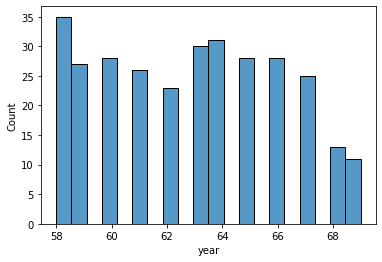

In [229]:
sns.histplot(data = df, x = "year", bins = 20)

## Obeservation 5

### Most no . of . operations were done in the year 1958.

### Lets find the success rate of operation for every particular year.

In [297]:
s = df[df["status"] == 1]           #s for survived
d = df[df["status"] == 2]          # d for died

#creating a new data frame 
sd = pd.DataFrame()
sd = sd.append(s["year"].value_counts())
sd = sd.append(d["year"].value_counts())
sd = sd.transpose()
sd.columns = ["survived", "died"]
sd["survive_percent"] = (sd["survived"]*100)/(sd["survived"] + sd["died"])
sd["died_percent"] = (sd["died"]*100)/(sd["survived"] + sd["died"])
sd


,survived,died,survive_percent,died_percent
58,24.0,11.0,68.571429,31.428571
60,24.0,4.0,85.714286,14.285714
64,23.0,8.0,74.193548,25.806452
61,23.0,3.0,88.461538,11.538462
63,22.0,8.0,73.333333,26.666667
66,22.0,6.0,78.571429,21.428571
67,21.0,4.0,84.000000,16.000000
59,18.0,9.0,66.666667,33.333333
62,16.0,7.0,69.565217,30.434783
65,15.0,13.0,53.571429,46.428571


## Observation no : 6
### We can see clearly that operations done in the year 1961 has most success rate. We might conclude that the billings hospital in chicago in which haberman data collected, might have focused a lot on health care in that year compared over other years As that is the best performing year of the hospital.

In [301]:
#analysis done by Uday sai Tanna
#120AD0022 AI and Ds 
#UG 2nd yr IIITDM kurnool